<a href="https://colab.research.google.com/github/impratik/Projects/blob/main/coviddashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Project Info ------------------------------------------------------------
# Date: 21-06-2021
# Data Set Link - https://ourworldindata.org/covid-deaths
# Project By Pratik Jadhav

In [83]:
library(tidyverse)
library(dplyr)
library(skimr)
library(lubridate)
library(openxlsx)

In [61]:
# Loading Data ------------------------------------------------------------

CovidDeaths <- read.csv('/content/CovidDeaths.csv', stringsAsFactors = TRUE)
CovidVaccinations <- read.csv('/content/CovidVaccinations.csv', stringsAsFactors = TRUE)


In [39]:
head(CovidDeaths)
head(CovidVaccinations)
skim(CovidDeaths)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,⋯,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,24-02-2020,38928341,1,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,AFG,Asia,Afghanistan,25-02-2020,38928341,1,0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,AFG,Asia,Afghanistan,26-02-2020,38928341,1,0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,AFG,Asia,Afghanistan,27-02-2020,38928341,1,0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,AFG,Asia,Afghanistan,28-02-2020,38928341,1,0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,AFG,Asia,Afghanistan,29-02-2020,38928341,1,0,0.143,NA,NA,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,⋯,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,24-02-2020,NA,NA,NA,NA,NA,NA,⋯,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511,NA
2,AFG,Asia,Afghanistan,25-02-2020,NA,NA,NA,NA,NA,NA,⋯,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511,NA
3,AFG,Asia,Afghanistan,26-02-2020,NA,NA,NA,NA,NA,NA,⋯,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511,NA
4,AFG,Asia,Afghanistan,27-02-2020,NA,NA,NA,NA,NA,NA,⋯,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511,NA
5,AFG,Asia,Afghanistan,28-02-2020,NA,NA,NA,NA,NA,NA,⋯,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511,NA
6,AFG,Asia,Afghanistan,29-02-2020,NA,NA,NA,NA,NA,NA,⋯,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511,NA


Warning message in sorted_count(x):
“Variable contains value(s) of "" that have been converted to "empty".”


── Data Summary ────────────────────────
                           Values     
Name                       CovidDeaths
Number of rows             97125      
Number of columns          26         
_______________________               
Column type frequency:                
  factor                   4          
  numeric                  22         
________________________              
Group variables            None       

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 iso_code              0             1 FALSE        231
2 continent             0             1 FALSE          7
3 location              0             1 FALSE        231
4 date                  0             1 FALSE        537
  top_counts                                    
1 ARG: 537, MEX: 537, THA: 534, PER: 532        
2 Afr: 25035, Asi: 23042, Eur: 23022, Nor: 11989
3 Arg: 537, Mex: 537, Tha: 534, Per: 532        
4 01-:

In [62]:
CovidDeaths$date <- dmy(CovidDeaths$date)
CovidVaccinations$date <- dmy(CovidVaccinations$date)


In [63]:
CovidDeaths$total_cases[is.na(CovidDeaths$total_cases)] <- 0
CovidDeaths$total_deaths[is.na(CovidDeaths$total_deaths)] <- 0

CovidDeaths$new_cases[is.na(CovidDeaths$new_cases)] <-0
CovidDeaths$new_deaths[is.na(CovidDeaths$new_deaths)] <-0

In [64]:
# Data Manipulation -------------------------------------------------------

# Select data that we are going to be using
CovidDeaths %>% select(location, date , total_cases, new_cases, total_deaths, population) %>% 
  filter(CovidDeaths$continent != "") %>%  
  arrange(location, date)

location,date,total_cases,new_cases,total_deaths,population
<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2020-02-24,1,1,0,38928341
Afghanistan,2020-02-25,1,0,0,38928341
Afghanistan,2020-02-26,1,0,0,38928341
Afghanistan,2020-02-27,1,0,0,38928341
Afghanistan,2020-02-28,1,0,0,38928341
Afghanistan,2020-02-29,1,0,0,38928341
Afghanistan,2020-03-01,1,0,0,38928341
Afghanistan,2020-03-02,1,0,0,38928341
Afghanistan,2020-03-03,2,1,0,38928341


In [65]:
# Total Cases vs Total Deaths 
CovidDeaths %>% select(location, date , total_cases, total_deaths) %>% 
  filter(CovidDeaths$continent != "", ) %>%  
  mutate(DeathPercentage = (total_deaths / total_cases)*100 ) %>% 
  filter(location == "India")  %>% 
  arrange(location, date)

CovidDeaths %>% select(location, date , total_cases, total_deaths) %>% 
  filter(CovidDeaths$continent != "") %>%  
  mutate(DeathPercentage = (total_deaths / total_cases)*100 ) %>% 
  arrange(location, date)

location,date,total_cases,total_deaths,DeathPercentage
<fct>,<date>,<dbl>,<dbl>,<dbl>
India,2020-01-30,1,0,0
India,2020-01-31,1,0,0
India,2020-02-01,1,0,0
India,2020-02-02,2,0,0
India,2020-02-03,3,0,0
India,2020-02-04,3,0,0
India,2020-02-05,3,0,0
India,2020-02-06,3,0,0
India,2020-02-07,3,0,0


location,date,total_cases,total_deaths,DeathPercentage
<fct>,<date>,<dbl>,<dbl>,<dbl>
Afghanistan,2020-02-24,1,0,0.000000
Afghanistan,2020-02-25,1,0,0.000000
Afghanistan,2020-02-26,1,0,0.000000
Afghanistan,2020-02-27,1,0,0.000000
Afghanistan,2020-02-28,1,0,0.000000
Afghanistan,2020-02-29,1,0,0.000000
Afghanistan,2020-03-01,1,0,0.000000
Afghanistan,2020-03-02,1,0,0.000000
Afghanistan,2020-03-03,2,0,0.000000


In [66]:
# Total Cases Vs Population

CovidDeaths %>% select(location, date , total_cases, population) %>% 
  filter(CovidDeaths$continent != "") %>% 
  mutate(PopulationInfected = (total_cases / population)*100 ) %>% 
  filter(location == "India")  %>% 
  arrange(location, date)

# Total Cases Vs Population

CovidDeaths %>% select(location, date , total_cases, population) %>% 
  filter(CovidDeaths$continent != "") %>% 
  mutate(PopulationInfected = (total_cases / population)*100 ) %>%  
  arrange(location, date)


location,date,total_cases,population,PopulationInfected
<fct>,<date>,<dbl>,<dbl>,<dbl>
India,2020-01-30,1,1380004385,7.246354e-08
India,2020-01-31,1,1380004385,7.246354e-08
India,2020-02-01,1,1380004385,7.246354e-08
India,2020-02-02,2,1380004385,1.449271e-07
India,2020-02-03,3,1380004385,2.173906e-07
India,2020-02-04,3,1380004385,2.173906e-07
India,2020-02-05,3,1380004385,2.173906e-07
India,2020-02-06,3,1380004385,2.173906e-07
India,2020-02-07,3,1380004385,2.173906e-07


location,date,total_cases,population,PopulationInfected
<fct>,<date>,<dbl>,<dbl>,<dbl>
Afghanistan,2020-02-24,1,38928341,2.568823e-06
Afghanistan,2020-02-25,1,38928341,2.568823e-06
Afghanistan,2020-02-26,1,38928341,2.568823e-06
Afghanistan,2020-02-27,1,38928341,2.568823e-06
Afghanistan,2020-02-28,1,38928341,2.568823e-06
Afghanistan,2020-02-29,1,38928341,2.568823e-06
Afghanistan,2020-03-01,1,38928341,2.568823e-06
Afghanistan,2020-03-02,1,38928341,2.568823e-06
Afghanistan,2020-03-03,2,38928341,5.137645e-06


In [67]:
# Countries with Highest infection rate as compare to population


CovidDeaths %>%  select(continent, location , population , total_cases, date) %>% filter(continent != "") %>% 
  group_by(location, population) %>% 
  summarise(HighestInfectionCount = max(total_cases), 
            PercentPopulationInfected = max(total_cases/population) * 100 ) %>% 
  arrange(desc(PercentPopulationInfected))


`summarise()` has grouped output by 'location'. You can override using the `.groups` argument.



location,population,HighestInfectionCount,PercentPopulationInfected
<fct>,<dbl>,<dbl>,<dbl>
Andorra,77265,13842,17.914968
Montenegro,628062,100075,15.933936
Czechia,10708982,1666025,15.557268
Bahrain,1701583,262892,15.449849
San Marino,33938,5090,14.997937
Seychelles,98340,14123,14.361399
Maldives,540542,71896,13.300724
Slovenia,2078932,256982,12.361251
Luxembourg,625976,70516,11.264969


In [69]:
sum(is.na(CovidDeaths$total_cases))

[1] 0

In [68]:
# Showing countries with highest Death count per population

CovidDeaths %>%  select(location , continent, total_deaths) %>% filter(continent != "" , !(is.na(total_deaths))) %>% 
  group_by(location) %>%
  summarise(TotalDeathCount = max(total_deaths)) %>% 
  arrange(desc(TotalDeathCount)) 

location,TotalDeathCount
<fct>,<dbl>
United States,601824
Brazil,501825
India,388135
Mexico,231187
Peru,190202
United Kingdom,128240
Italy,127270
Russia,127206
France,110900


In [70]:
# showing continent with highest death count per population
CovidDeaths %>%  select(location , continent, total_deaths) %>% filter(CovidDeaths$continent == "") %>% 
  group_by(location) %>%
  summarise(TotalDeathCount = max(total_deaths)) %>% 
  arrange(desc(TotalDeathCount))

location,TotalDeathCount
<fct>,<dbl>
World,3866158
Europe,1095130
South America,970711
North America,895792
Asia,765932
European Union,735883
Africa,137461
Oceania,1117
International,15


In [87]:
# Global Data on each day

CovidDeaths %>% select(date,total_cases,location, total_deaths, new_cases, new_deaths, continent) %>%  group_by(location,date) %>% 
  filter(continent != "") %>% summarise( total_cases = sum(new_cases),
                            total_deaths = sum(new_deaths),
                            DeathPercentage = (sum(new_deaths)/sum(new_cases,na.rm = T)) * 100)


`summarise()` has grouped output by 'location'. You can override using the `.groups` argument.



location,date,total_cases,total_deaths,DeathPercentage
<fct>,<date>,<dbl>,<dbl>,<dbl>
Afghanistan,2020-02-24,1,0,0
Afghanistan,2020-02-25,0,0,NaN
Afghanistan,2020-02-26,0,0,NaN
Afghanistan,2020-02-27,0,0,NaN
Afghanistan,2020-02-28,0,0,NaN
Afghanistan,2020-02-29,0,0,NaN
Afghanistan,2020-03-01,0,0,NaN
Afghanistan,2020-03-02,0,0,NaN
Afghanistan,2020-03-03,1,0,0


In [89]:
# GLobal Data total
CovidDeaths %>% select(total_cases, total_deaths, new_cases, new_deaths, continent) %>%
  filter(continent != "") %>% summarise( total_cases = sum(new_cases),
                                         total_deaths = sum(new_deaths),
                                         DeathPercentage = (sum(new_deaths)/sum(new_cases)) * 100)

total_cases,total_deaths,DeathPercentage
<dbl>,<dbl>,<dbl>
178011533,3866126,2.17184


In [90]:
CovidVaccinations$new_vaccinations[is.na(CovidVaccinations$new_vaccinations)] <- 0

In [93]:
# Joining two dataset ----------------------------------------------------
# Total population vs Vaccination
df <- inner_join(CovidDeaths, CovidVaccinations, by = c("location", "date"))
df %>%  select(continent.x , location, date, population , new_vaccinations) %>% 
  filter(continent.x != "") %>% 
  group_by(location) %>% 
  mutate(RollingPeopleVaccinated = cumsum(new_vaccinations))

continent.x,location,date,population,new_vaccinations,RollingPeopleVaccinated
<fct>,<fct>,<date>,<dbl>,<dbl>,<dbl>
Asia,Afghanistan,2020-02-24,38928341,0,0
Asia,Afghanistan,2020-02-25,38928341,0,0
Asia,Afghanistan,2020-02-26,38928341,0,0
Asia,Afghanistan,2020-02-27,38928341,0,0
Asia,Afghanistan,2020-02-28,38928341,0,0
Asia,Afghanistan,2020-02-29,38928341,0,0
Asia,Afghanistan,2020-03-01,38928341,0,0
Asia,Afghanistan,2020-03-02,38928341,0,0
Asia,Afghanistan,2020-03-03,38928341,0,0


In [92]:
# Total percent of vaccination done against population
df %>%  select(continent.x , location, date, population , new_vaccinations) %>% 
  filter(continent.x != "") %>% 
  group_by(location) %>% 
  mutate(RollingPeopleVaccinated = cumsum(replace_na(new_vaccinations,0))) %>%
  mutate(total  = RollingPeopleVaccinated/population * 100)

continent.x,location,date,population,new_vaccinations,RollingPeopleVaccinated,total
<fct>,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
Asia,Afghanistan,2020-02-24,38928341,0,0,0
Asia,Afghanistan,2020-02-25,38928341,0,0,0
Asia,Afghanistan,2020-02-26,38928341,0,0,0
Asia,Afghanistan,2020-02-27,38928341,0,0,0
Asia,Afghanistan,2020-02-28,38928341,0,0,0
Asia,Afghanistan,2020-02-29,38928341,0,0,0
Asia,Afghanistan,2020-03-01,38928341,0,0,0
Asia,Afghanistan,2020-03-02,38928341,0,0,0
Asia,Afghanistan,2020-03-03,38928341,0,0,0


In [94]:
# Tables for visualization ------------------------------------
table1 <- CovidDeaths %>% select(total_cases, total_deaths, new_cases, new_deaths, continent) %>%
  filter(continent != "") %>% summarise( total_cases = sum(new_cases),
                                         total_deaths = sum(new_deaths),
                                         DeathPercentage = (sum(new_deaths)/sum(new_cases)) * 100)
table1

total_cases,total_deaths,DeathPercentage
<dbl>,<dbl>,<dbl>
178011533,3866126,2.17184


In [95]:
# 2...........
`%!in%` = Negate(`%in%`)

table2 <- CovidDeaths %>% select(total_cases, total_deaths, new_cases, new_deaths, continent, location) %>%
  filter(continent == "" , location %!in% c('World', 'European Union', 'International') ) %>% group_by(location) %>% 
  summarise( TotalDeathCount = sum(new_deaths))

table2

location,TotalDeathCount
<fct>,<dbl>
Africa,137461
Asia,765915
Europe,1095130
North America,895792
Oceania,1117
South America,970711


In [100]:
table3 <- df %>%  select(location, population, total_cases) %>%  group_by(location, population) %>% 
  summarise(HighestInfectionCount = max(total_cases) , PercentPopulationInfected =max((total_cases/population)) * 100) %>% 
  arrange(desc(PercentPopulationInfected))

table3[is.na(table3)] <-0 

table3

`summarise()` has grouped output by 'location'. You can override using the `.groups` argument.



location,population,HighestInfectionCount,PercentPopulationInfected
<fct>,<dbl>,<dbl>,<dbl>
Andorra,77265,13842,17.914968
Montenegro,628062,100075,15.933936
Czechia,10708982,1666025,15.557268
Bahrain,1701583,262892,15.449849
San Marino,33938,5090,14.997937
Seychelles,98340,14123,14.361399
Maldives,540542,71896,13.300724
Slovenia,2078932,256982,12.361251
Luxembourg,625976,70516,11.264969


In [101]:
table4 <- df %>%  select(location, population,date, total_cases) %>%  group_by(location, population, date) %>% 
  summarise(HighestInfectionCount = max(total_cases) , PercentPopulationInfected =max((total_cases/population)) * 100) %>% 
  arrange(desc(PercentPopulationInfected))

table4[is.na(table4)] <-0 

table4

`summarise()` has grouped output by 'location', 'population'. You can override using the `.groups` argument.



location,population,date,HighestInfectionCount,PercentPopulationInfected
<fct>,<dbl>,<date>,<dbl>,<dbl>
Andorra,77265,2021-06-18,13842,17.91497
Andorra,77265,2021-06-19,13842,17.91497
Andorra,77265,2021-06-20,13842,17.91497
Andorra,77265,2021-06-17,13839,17.91109
Andorra,77265,2021-06-16,13836,17.90720
Andorra,77265,2021-06-15,13828,17.89685
Andorra,77265,2021-06-14,13826,17.89426
Andorra,77265,2021-06-11,13813,17.87743
Andorra,77265,2021-06-12,13813,17.87743


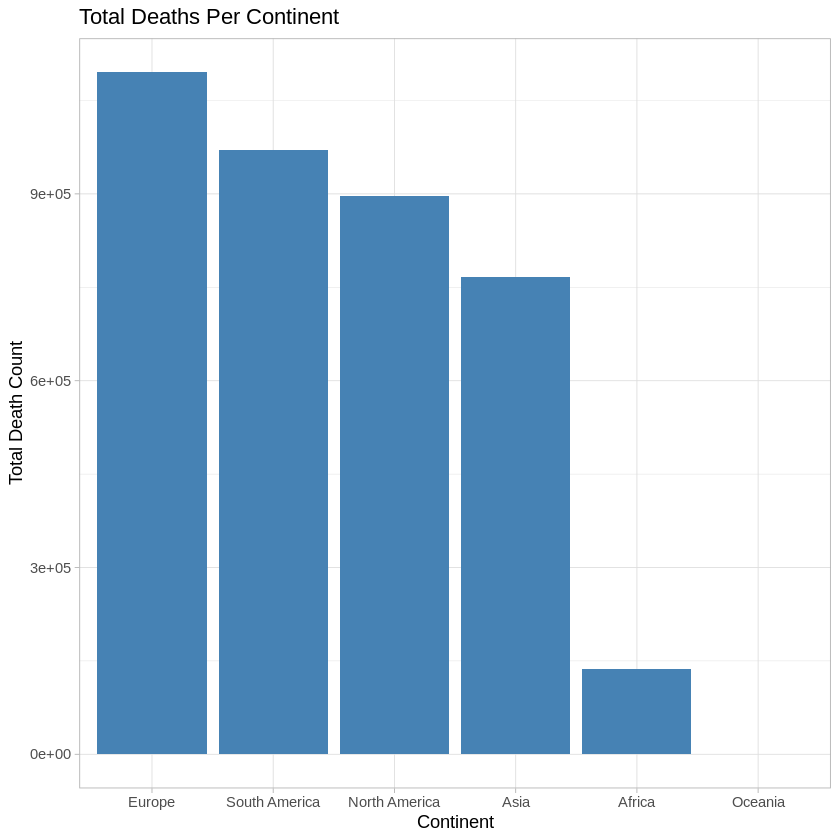

In [102]:
# Data Plotting -----------------------------------------------------------

table2 %>% 
  arrange(TotalDeathCount) %>% 
  mutate(location = factor(location, levels = c("Europe", "South America", "North America", "Asia" , "Africa" , "Oceania")))%>% 
  ggplot(aes(location, TotalDeathCount)) +
  geom_col(fill = "steelblue") + 
  xlab("Continent") + 
  ylab("Total Death Count") +
  theme_light() +
  ggtitle("Total Deaths Per Continent")

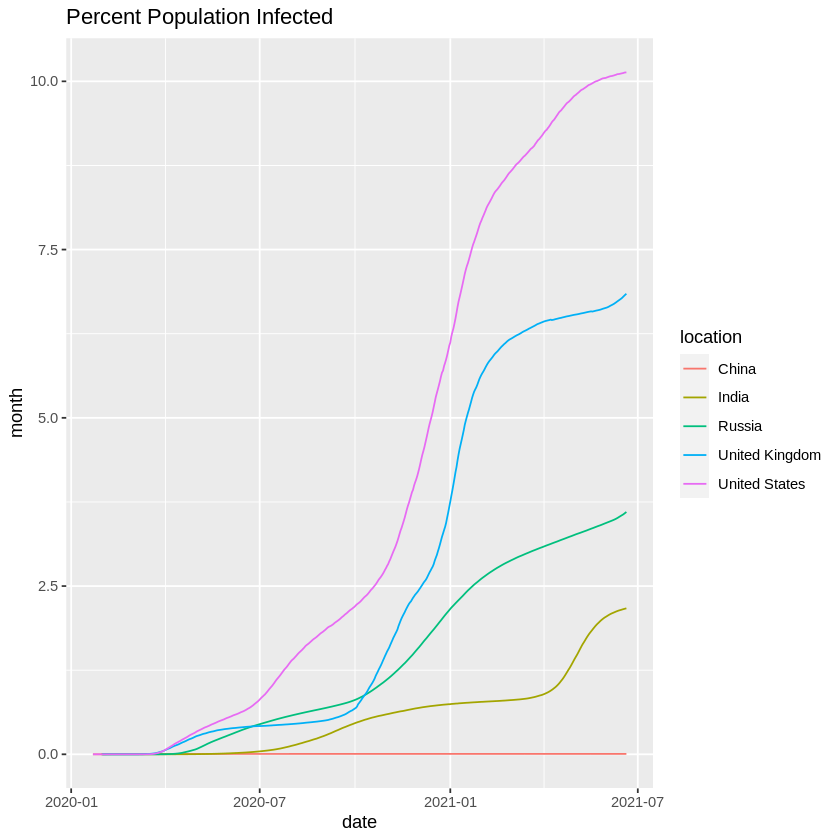

In [104]:
table4 %>% filter( str_detect(location,'India|United States|United Kingdom|China|Russia')) %>%  
  ggplot(aes(date, PercentPopulationInfected , color = location )) + geom_line() +
  ggtitle("Percent Population Infected") +
  ylab("month")

In [187]:
library(ggmap)
library(tidygeocoder)
# install.packages('maps')
library(maps)

# system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
# system('sudo apt-get update')
# system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')
# install.packages('sf')

library(sf)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 7.0.0



In [145]:

df$location <- as.character(df$location)

geo <- table3 %>% geocode(location,method = 'osm', lat = latitude , long = longitude)


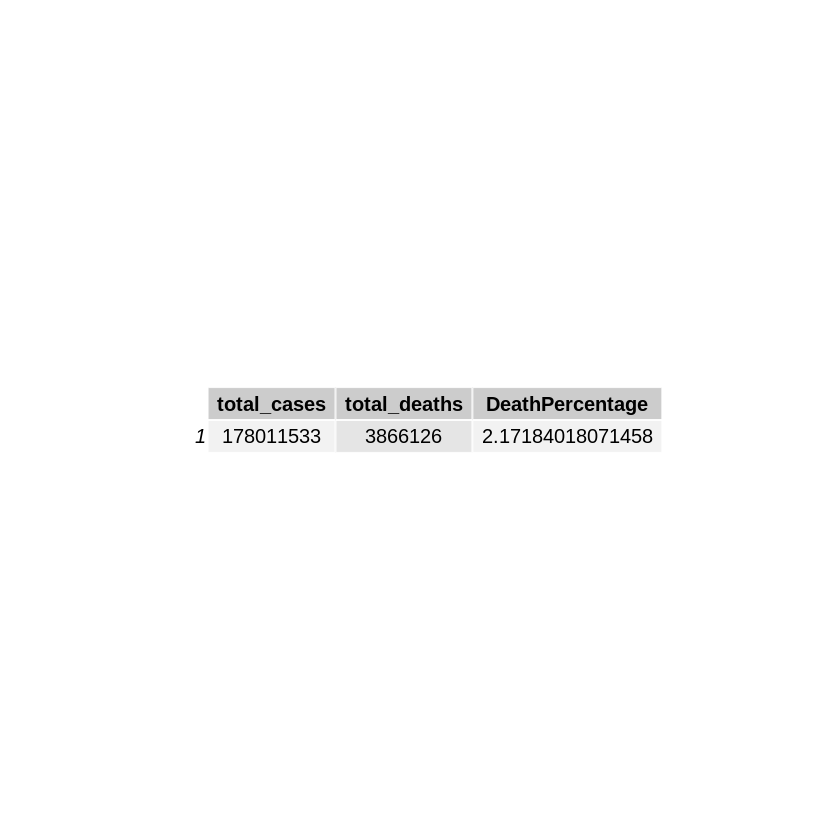

In [184]:
# library(gridExtra)


# install.packages('gridExtra')
library(gridExtra)
library(grid)

m1 <- ttheme_default(core=list(
        fg_params=list(fontface=c(rep("plain", 4), "bold.italic")),
        bg_params = list(fill=c(rep(c("grey95", "grey90"),
                                    length.out=4), "#6BAED6"),
                         alpha = rep(c(1,0.5), each=5))
        ))

grid.table(table1, theme = m1)

Warning message:
“Ignoring unknown aesthetics: x, y”


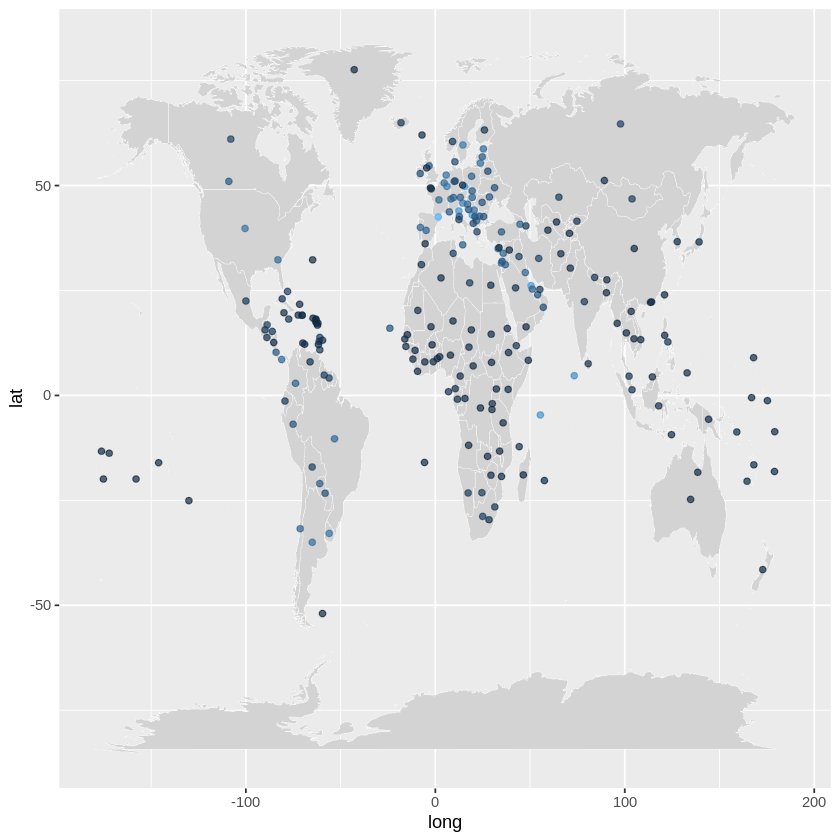

In [201]:
world <- map_data("world")

ggplot() +
  geom_map(
    data = world, map = world,
    aes(long, lat, map_id = region),
    color = "white", fill = "lightgray", size = 0.1
  ) +
  geom_point(
    data = geo,
    aes(longitude, latitude, color = PercentPopulationInfected , fill= PercentPopulationInfected),
    alpha = 0.7
  ) + theme(legend.position = "none")

Warning message:
“Ignoring unknown aesthetics: x, y”


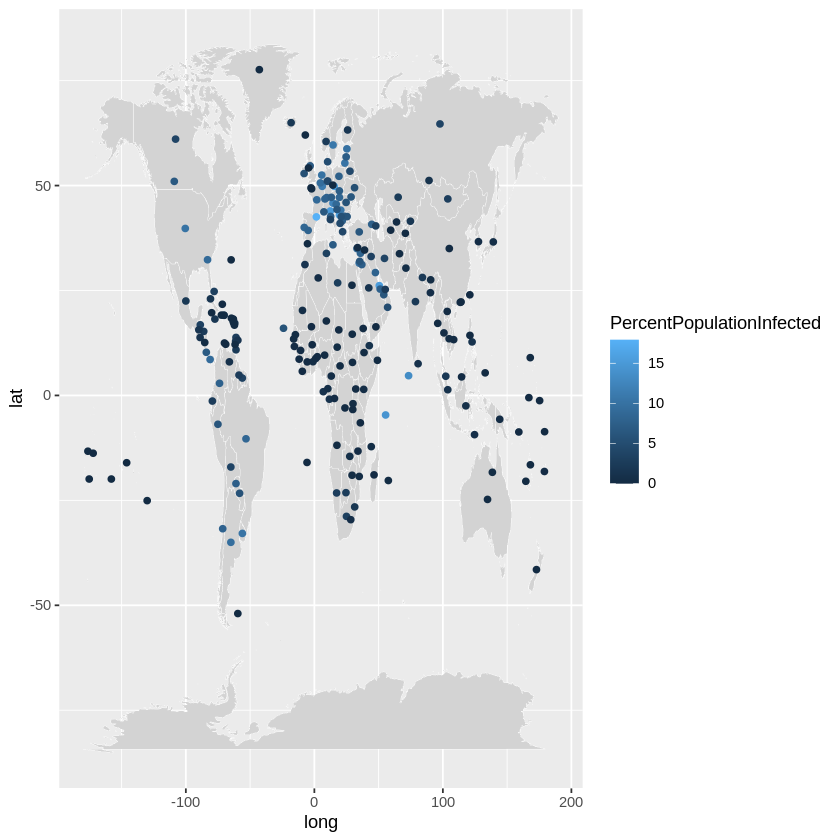

In [205]:


ggplot() +
  geom_map(
    data = world, map = world,
    aes(long, lat, map_id = region),
    color = "white", fill = "lightgray", size = 0.1
  ) + geom_point(
    size = 
    data = geo,
    aes(longitude,latitude, color = PercentPopulationInfected )
  )